In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

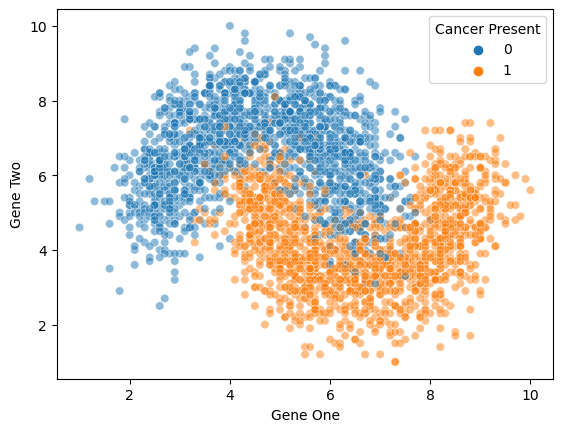

In [7]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.5)

In [6]:
len(df)

3000

(4.0, 8.0)

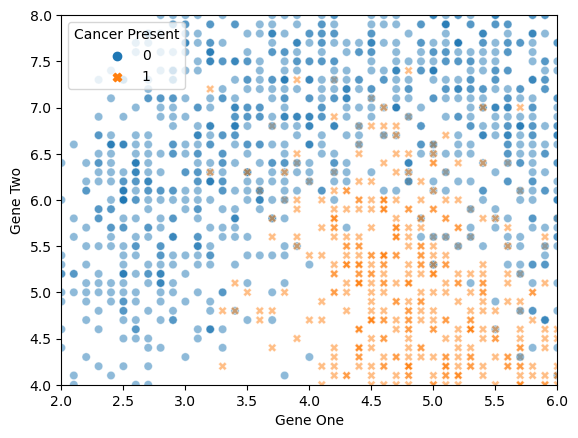

In [10]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.5
               , style = 'Cancer Present')
# focus on certain range of X or Y
plt.xlim(2,6)
plt.ylim(4,8)

<Axes: xlabel='Gene One', ylabel='Gene Two'>

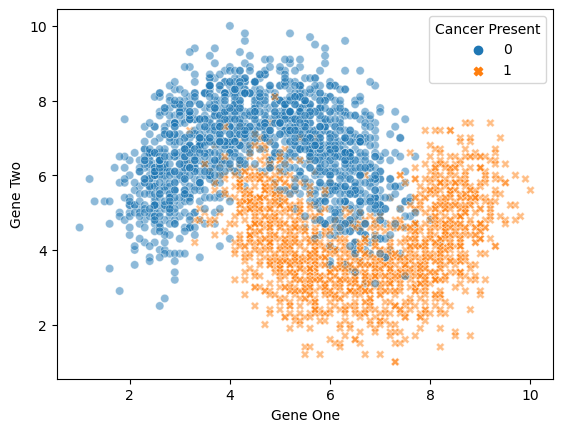

In [11]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.5
               , style = 'Cancer Present')

C:\Users\Zahid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


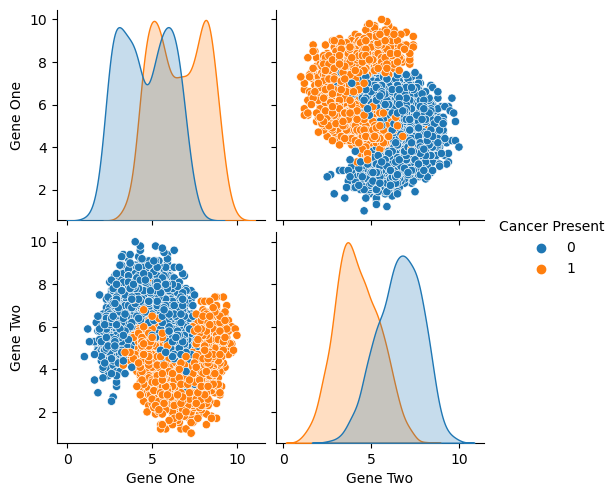

In [12]:
sns.pairplot(data=df, hue='Cancer Present')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop('Cancer Present', axis = 1)

In [17]:
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knn_model.predict(scaled_X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

In [29]:
len(y_test)

900

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



In [31]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.9011111111111111

In [36]:
#percentage of getting wrong
1 - accuracy_score(y_test,y_pred)

0.09888888888888892

In [39]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    

In [40]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

Text(0.5, 0, 'K Neighbours')

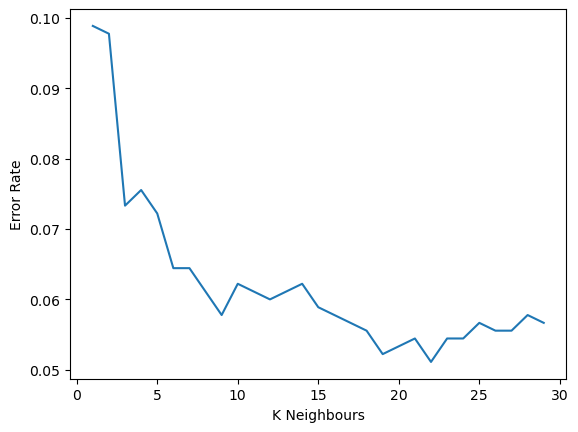

In [41]:
plt.plot(range(1,30), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbours')

In [42]:
scaler = StandardScaler()

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [45]:
operations = [('scaler', scaler), ('knn', knn) ]

In [47]:
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline(operations)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
k_values = list(range(1,20))

In [51]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [53]:
param_grid = {'knn__n_neighbors': k_values}

In [54]:
full_cv_classifier = GridSearchCV(pipe,param_grid, cv = 5, scoring = 'accuracy')

In [55]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [56]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [58]:
full_pred = full_cv_classifier.predict(X_test)

In [59]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [60]:
#lets predict with new feature set
new_patient_1 = [[3.8, 6.4]]

In [62]:
full_cv_classifier.predict(new_patient_1)

C:\Users\Zahid\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)